link do curso: https://www.kaggle.com/ryanholbrook/linear-regression-with-time-series


In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib_inline.config import InlineBackend

In [5]:
df = pd.read_csv('datasets/book_sales.csv', index_col='Date', parse_dates=['Date']).drop('Paperback', axis=1)
print(df.head(3))

            Hardcover
Date                 
2000-04-01        139
2000-04-02        128
2000-04-03        172


In [6]:
df['Time'] = np.arange(len(df.index))
print(df.head(2))

            Hardcover  Time
Date                       
2000-04-01        139     0
2000-04-02        128     1


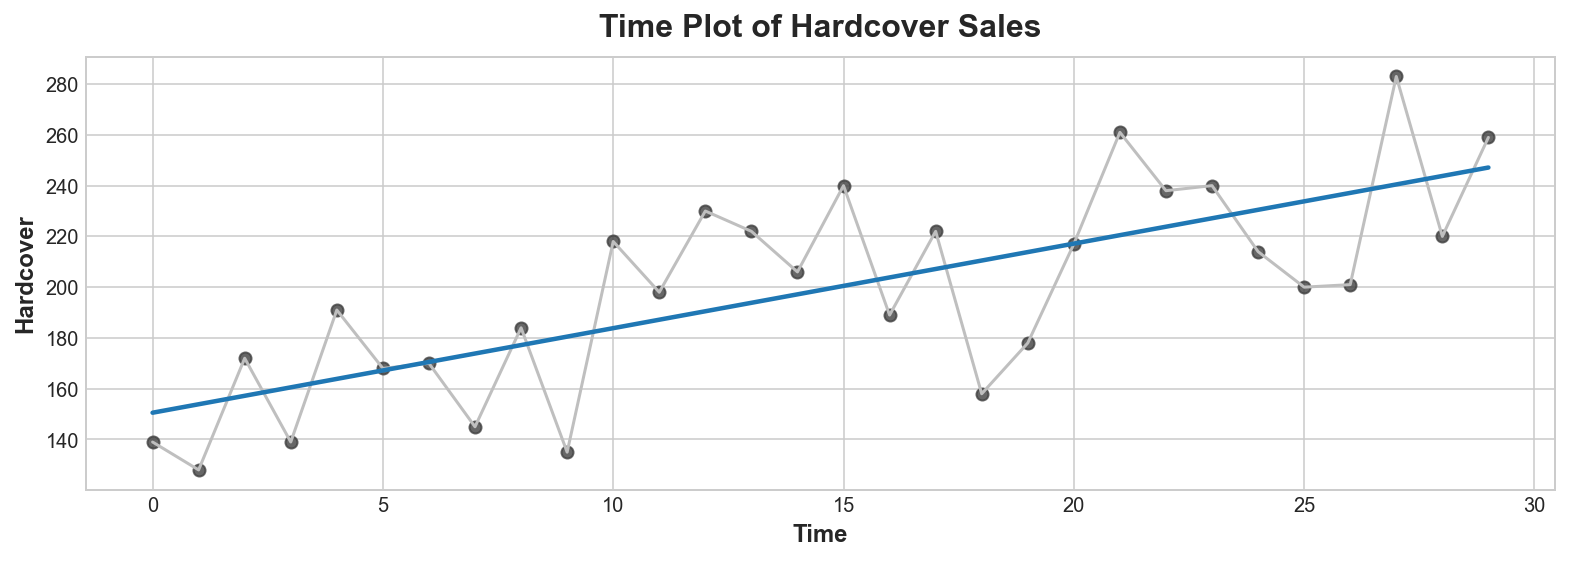

In [7]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

### Lag features

Para fazer um recurso de atraso, mudamos as observações da série alvo para que pareçam ter ocorrido mais tarde. Aqui, criamos um recurso de atraso de 1 etapa, embora também seja possível alternar várias etapas.   

Séries temporais

Série temporal é um conjunto de observações coletadas sequencialmente em um determinado espaço de tempo. Este espaço de tempo geralmente é descrito da seguinte forma:

    t = instante atual
    t-n = instante n anterior a t, também conhecido como lag time
    t+n instante n posterior a t, também conhecido como forecast time


In [8]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns = ['Hardcover', 'Lag_1'])
df.head(3)

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0


Text(0.5, 1.0, 'Lag Plot of Hardcore Sales')

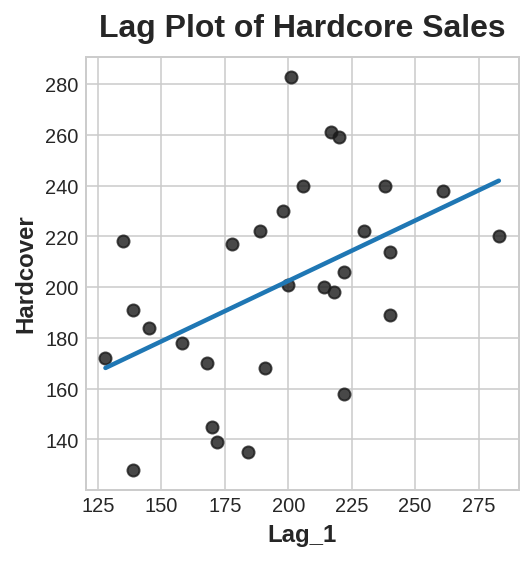

In [20]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.10'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcore Sales')